# Jak rozhodovací strom vybírá nejlepší otázku?

## Cíl lekce

Po dokončení této lekce budete:
- **Rozumět**, jak strom vybírá nejlepší otázku pro rozdělení
- **Znát pojem "čistota"** skupiny
- **Umět spočítat Gini index** - míru nečistoty

## Problém výběru otázky

Když strom roste, musí se rozhodnout:
- **Kterou otázku položit?** (který atribut použít)
- **Kde udělat řez?** (jakou hodnotu zvolit jako práh)

### Příklad:
Máme studenty a můžeme se ptát:
- Hodiny učení > 3?
- Účast > 70%?
- Dělá domácí úkoly?

**Která otázka je nejlepší?**

## Čistota skupiny

**Čistá skupina** = všichni patří do stejné třídy
**Nečistá skupina** = mix různých tříd

### Vizuální představa:

| Skupina | Složení | Čistota |
|---------|---------|----------|
| A | 🟢🟢🟢🟢 (4 prošli) | **Čistá** ✅ |
| B | 🔴🔴🔴🔴 (4 neprošli) | **Čistá** ✅ |
| C | 🟢🟢🔴🔴 (2 prošli, 2 neprošli) | **Nečistá** ❌ |
| D | 🟢🔴🔴🔴 (1 prošel, 3 neprošli) | **Částečně čistá** ⚠️ |

**Cíl:** Vytvořit co nejčistší skupiny!

## Gini Index - měření nečistoty

**Gini Index** je číslo, které měří, jak "nečistá" je skupina.

### Vzorec:

$$Gini = 1 - (p_{prošli}^2 + p_{neprošli}^2)$$

### Vysvětlení symbolů:
- **Gini** = výsledná hodnota nečistoty (číslo mezi 0 a 0.5)
- **1** = jednička, od které odečítáme
- **$p_{prošli}$** = podíl studentů, kteří prošli (např. 3 z 10 = 0.3)
- **$p_{neprošli}$** = podíl studentů, kteří neprošli (např. 7 z 10 = 0.7)
- **$p^2$** = podíl umocněný na druhou (např. 0.3² = 0.09)

### Interpretace:
- **Gini = 0** → skupina je čistá (všichni stejní)
- **Gini = 0.5** → maximální chaos (50/50)

## Příklady výpočtu Gini

### Příklad 1: Čistá skupina
**Skupina:** 5 studentů prošlo, 0 neprošlo

| Výpočet | Hodnota |
|---------|----------|
| $p_{prošli}$ | 5/5 = 1.0 |
| $p_{neprošli}$ | 0/5 = 0.0 |
| $p_{prošli}^2$ | 1.0² = 1.0 |
| $p_{neprošli}^2$ | 0.0² = 0.0 |
| **Gini** | 1 - (1.0 + 0.0) = **0** ✅ |

### Příklad 2: Maximálně nečistá skupina
**Skupina:** 4 studenti prošli, 4 neprošli

| Výpočet | Hodnota |
|---------|----------|
| $p_{prošli}$ | 4/8 = 0.5 |
| $p_{neprošli}$ | 4/8 = 0.5 |
| $p_{prošli}^2$ | 0.5² = 0.25 |
| $p_{neprošli}^2$ | 0.5² = 0.25 |
| **Gini** | 1 - (0.25 + 0.25) = **0.5** ❌ |

### Příklad 3: Částečně čistá skupina
**Skupina:** 6 studentů prošlo, 2 neprošli

| Výpočet | Hodnota |
|---------|----------|
| $p_{prošli}$ | 6/8 = 0.75 |
| $p_{neprošli}$ | 2/8 = 0.25 |
| $p_{prošli}^2$ | 0.75² = 0.5625 |
| $p_{neprošli}^2$ | 0.25² = 0.0625 |
| **Gini** | 1 - (0.5625 + 0.0625) = **0.375** ⚠️ |

## Jak vybrat nejlepší rozdělení?

### Dataset: 8 studentů

| Student | Hodiny učení | Účast (%) | Prošel |
|---------|-------------|-----------|--------|
| 1 | 2 | 40 | Ne |
| 2 | 3 | 50 | Ne |
| 3 | 4 | 60 | Ne |
| 4 | 5 | 70 | Ne |
| 5 | 6 | 75 | Ano |
| 6 | 7 | 80 | Ano |
| 7 | 8 | 85 | Ano |
| 8 | 9 | 90 | Ano |

### Testujeme 2 možná rozdělení:

#### Rozdělení A: Hodiny ≤ 5
- **Levá skupina** (hodiny ≤ 5): studenti 1,2,3,4 → všichni Neprošli
- **Pravá skupina** (hodiny > 5): studenti 5,6,7,8 → všichni Prošli

**Výpočet Gini:**
- Gini(levá) = 1 - (0² + 1²) = 0
- Gini(pravá) = 1 - (1² + 0²) = 0
- **Průměr:** (4/8 × 0) + (4/8 × 0) = **0** ✅ Perfektní!

#### Rozdělení B: Účast ≤ 65%
- **Levá skupina** (účast ≤ 65): studenti 1,2,3 → všichni Neprošli
- **Pravá skupina** (účast > 65): studenti 4,5,6,7,8 → 1 Neprošel, 4 Prošli

**Výpočet Gini:**
- Gini(levá) = 1 - (0² + 1²) = 0
- Gini(pravá) = 1 - (0.8² + 0.2²) = 0.32
- **Průměr:** (3/8 × 0) + (5/8 × 0.32) = **0.2** ⚠️

### Závěr:
**Rozdělení A je lepší** (Gini = 0 vs. 0.2) → Použijeme otázku "Hodiny > 5?"

## Import knihoven

Nyní, když rozumíme teorii, můžeme importovat knihovny pro vizualizaci:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Nastavení pro hezčí grafy
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11

## Vizualizace Gini indexu

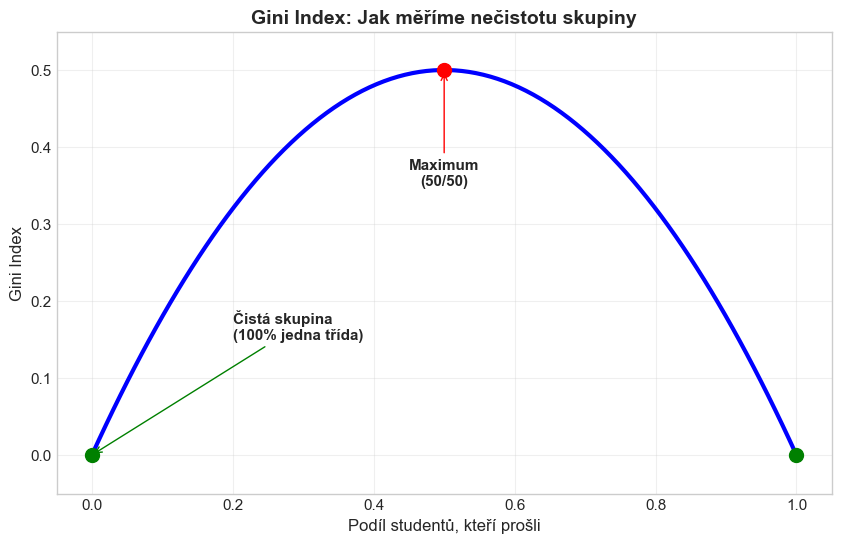

In [2]:
# Vizualizace Gini indexu pro různé podíly tříd
p_prosli = np.linspace(0, 1, 100)
gini_values = 1 - (p_prosli**2 + (1-p_prosli)**2)

plt.figure(figsize=(10, 6))
plt.plot(p_prosli, gini_values, 'b-', linewidth=3)
plt.xlabel('Podíl studentů, kteří prošli', fontsize=12)
plt.ylabel('Gini Index', fontsize=12)
plt.title('Gini Index: Jak měříme nečistotu skupiny', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Důležité body
plt.plot(0.5, 0.5, 'ro', markersize=10)
plt.annotate('Maximum\n(50/50)', xy=(0.5, 0.5), xytext=(0.5, 0.35),
            ha='center', fontsize=11, fontweight='bold',
            arrowprops=dict(arrowstyle='->', color='red'))

plt.plot([0, 1], [0, 0], 'go', markersize=10)
plt.annotate('Čistá skupina\n(100% jedna třída)', xy=(0, 0), xytext=(0.2, 0.15),
            fontsize=11, fontweight='bold',
            arrowprops=dict(arrowstyle='->', color='green'))

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 0.55)
plt.show()

## Porovnání různých rozdělení

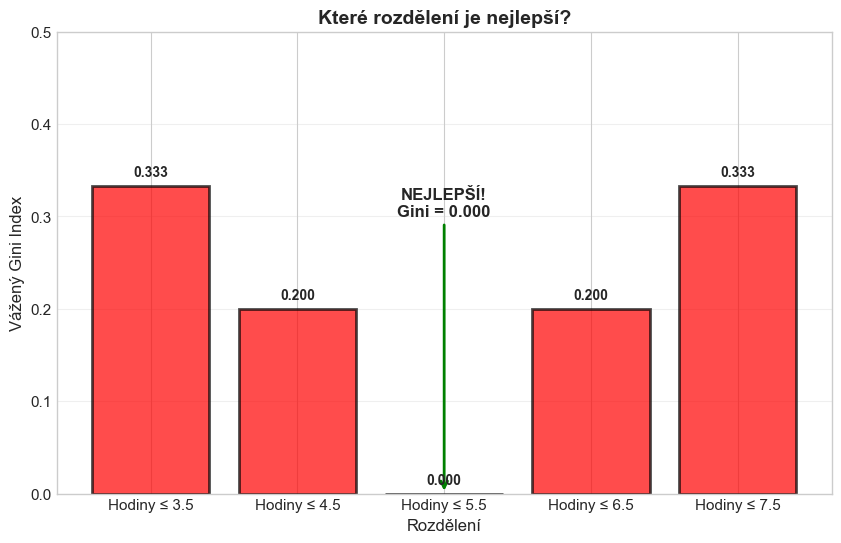

In [3]:
# Data našich 8 studentů
hodiny = np.array([2, 3, 4, 5, 6, 7, 8, 9])
prosel = np.array([0, 0, 0, 0, 1, 1, 1, 1])  # 0=Ne, 1=Ano

# Funkce pro výpočet Gini
def calculate_gini(labels):
    if len(labels) == 0:
        return 0
    p_prosli = np.sum(labels) / len(labels)
    p_neprosli = 1 - p_prosli
    return 1 - (p_prosli**2 + p_neprosli**2)

# Testování různých prahů
prahy = [3.5, 4.5, 5.5, 6.5, 7.5]
gini_scores = []
nazvy = ['Hodiny ≤ 3.5', 'Hodiny ≤ 4.5', 'Hodiny ≤ 5.5', 'Hodiny ≤ 6.5', 'Hodiny ≤ 7.5']

for prah in prahy:
    leva_skupina = prosel[hodiny <= prah]
    prava_skupina = prosel[hodiny > prah]
    
    # Vážený průměr Gini indexů
    n_leva = len(leva_skupina)
    n_prava = len(prava_skupina)
    n_celkem = n_leva + n_prava
    
    vazeny_gini = (n_leva/n_celkem) * calculate_gini(leva_skupina) + \
                  (n_prava/n_celkem) * calculate_gini(prava_skupina)
    gini_scores.append(vazeny_gini)

# Vizualizace
barvy = ['red' if g > 0.1 else 'green' for g in gini_scores]

plt.figure(figsize=(10, 6))
bars = plt.bar(nazvy, gini_scores, color=barvy, alpha=0.7, edgecolor='black', linewidth=2)
plt.xlabel('Rozdělení', fontsize=12)
plt.ylabel('Vážený Gini Index', fontsize=12)
plt.title('Které rozdělení je nejlepší?', fontsize=14, fontweight='bold')
plt.ylim(0, 0.5)
plt.grid(True, alpha=0.3, axis='y')

# Označení nejlepšího
nejlepsi_idx = np.argmin(gini_scores)
plt.annotate(f'NEJLEPŠÍ!\nGini = {gini_scores[nejlepsi_idx]:.3f}',
            xy=(nejlepsi_idx, gini_scores[nejlepsi_idx]),
            xytext=(nejlepsi_idx, 0.3),
            ha='center', fontsize=12, fontweight='bold',
            arrowprops=dict(arrowstyle='->', color='green', lw=2))

# Přidání hodnot na sloupce
for i, (bar, score) in enumerate(zip(bars, gini_scores)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{score:.3f}', ha='center', fontsize=10, fontweight='bold')

plt.show()

## Shrnutí

### Co jsme se naučili:

1. **Strom hledá nejlepší otázku** podle čistoty skupin
2. **Gini Index** měří nečistotu (0 = čistá, 0.5 = chaos)
3. **Nejlepší rozdělení** = nejmenší Gini Index
4. **Výpočet:** Gini = 1 - (p₁² + p₂²)

### Praktická rada:
Když vytváříte rozhodovací strom ručně, vždy vyberte otázku, která vytvoří nejčistší skupiny!